In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [4]:
#loading data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

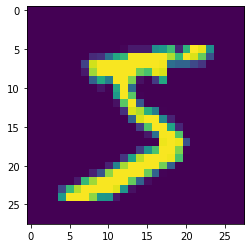

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(x_train[0])
print(y_train[0])

In [7]:
#normalizing the values
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation= tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [10]:
#creating call back to stop training when accuracy reaches threshold
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('acc') > 0.99):
            print('Reached 99% accuracy so cancelling training!')
            self.model.stop_training= True

In [11]:
callbacks=myCallback()
history = model.fit(x_train, y_train, epochs=10) #callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1834 - acc: 0.9457
Epoch 2/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0744 - acc: 0.9765
Epoch 3/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0478 - acc: 0.9853
Epoch 4/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0339 - acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0259 - acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0218 - acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0185 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0137 - acc: 0.9951
Epoch 9/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0136 - acc: 0.9956
Epoch 10/10
60000/60000 [==============================] - 7s 116us/sampl

In [12]:
predictions=model.predict(x_test)

In [13]:
#predictions[2] is a list that shows the probability of number being 0-9 wrt index values
#Example predictions[2][0] is the probability of number being "0" is 1.6942316e-15
print(predictions[2],y_test[2])

[2.5696430e-15 9.9999940e-01 3.6918093e-09 1.3616032e-13 2.6502192e-09
 1.0785308e-10 7.5319868e-11 6.2971498e-07 4.2518891e-09 1.3795256e-13] 1


In [14]:
test_labels = [np.argmax(i) for i in predictions]
image_id = [j+1 for j in range(len(predictions))]

my_submission = pd.DataFrame({'ImageId': image_id,
                           'Label': test_labels},
                          index=None)
my_submission.to_csv('submission.csv', index=False)

In [15]:
pd.read_csv("submission.csv")

,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
...,...,...
9995,9996,2
9996,9997,3
9997,9998,4
9998,9999,5
